In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

In [2]:
# load data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# load with sentiment analysis
# df_train = pd.read_csv('train_sent.csv')
# df_test = pd.read_csv('test_sent.csv')


In [3]:
df_train.columns

Index(['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Views', 'Likes', 'Stream', 'Album_type', 'Licensed',
       'official_video', 'id', 'Track', 'Album', 'Uri', 'Url_spotify',
       'Url_youtube', 'Comments', 'Description', 'Title', 'Channel',
       'Composer', 'Artist'],
      dtype='object')

In [4]:
df_train.dtypes

Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Views               float64
Likes               float64
Stream              float64
Album_type           object
Licensed             object
official_video       object
id                    int64
Track                object
Album                object
Uri                  object
Url_spotify          object
Url_youtube          object
Comments            float64
Description          object
Title                object
Channel              object
Composer             object
Artist               object
dtype: object

In [5]:
def create_dictionary(keys):
    dictionary = {}
    for key in keys:
        dictionary[key] = None  
    return dictionary


def data_process_keep_only_numerical(input_data):
    numeric_columns = input_data.select_dtypes(include=['int64', 'float64'])
    return numeric_columns

def word_dictionary(arr_columns, input_train, input_test):
    # Append the two DataFrames
    appended_df = pd.concat([input_train, input_test])
    appended_df.reset_index(drop=True, inplace=True)
    arr_word_dict = {}
    for col in arr_columns:
        uniq_tmp = appended_df[col].unique()
        arr_dict = {value: value if isinstance(value, (int, float)) and np.isnan(value) else index for index, value in enumerate(uniq_tmp)}
        arr_word_dict[col] = arr_dict
    return arr_word_dict

word_dict = word_dictionary([
    'Album_type', 'Licensed', 'official_video', 'Track', 'Album', 'Uri', 'Url_spotify', 'Url_youtube', 
    'Description', 'Title', 'Channel', 'Composer', 'Artist'], df_train, df_test)

# Using Dictionary:
#   Album_type, Licensed, official_video, Composer, Channel, Artist
# Can be removed:
#   Uri, Url_spotify, Url_youtube
# Cannot use word_dict:
#   Track, Album, Description, Title
# ret_train.head()
# ret_test.head()

In [6]:
word_dict['Album_type']

{'album': 0, nan: nan, 'single': 2, 'compilation': 3}

In [7]:
df_train.head(4)

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,...,Album,Uri,Url_spotify,Url_youtube,Comments,Description,Title,Channel,Composer,Artist
0,0.0,0.000273,3.0,-25.176,0.0443,0.724151,0.000062,0.000807,0.340,83.398,...,Sinkovsky Plays and Sings Vivaldi,spotify:track:7njAZhca4o80qQdCgyEWya,https://open.spotify.com/artist/2QOIawHpSlOwXD...,https://www.youtube.com/watch?v=NzCL9uLkQSI,3070.0,Antonio Vivaldi's 4th Concerto - From his Most...,"Antonio Vivaldi - Concerto No.4 in F minor, Op...",Mozafunkula,NaN,Marshmello
1,0.0,0.184220,7.0,NaN,NaN,0.672221,0.910000,0.034966,0.746,148.692,...,NaN,spotify:track:2nnXe7n3Vivs7OfQKRsfWD,https://open.spotify.com/artist/2QOIawHpSlOwXD...,https://www.youtube.com/watch?v=jAnzlpPuIDU,122.0,"A. Vivaldi Concerto No. 2 in G minor, RV 315, ...","A. Vivaldi Concerto No. 2 in G minor, RV 315, ...",Anton Paisov,Finneas O'Connell,Bon Iver
2,0.0,NaN,6.0,-15.596,NaN,0.667628,0.867000,0.001772,0.380,84.899,...,Vivaldi: The Four Seasons,spotify:track:0VQMAup2VdeQWLCvM14Uz2,https://open.spotify.com/artist/2QOIawHpSlOwXD...,https://www.youtube.com/watch?v=jAnzlpPuIDU,122.0,"A. Vivaldi Concerto No. 2 in G minor, RV 315, ...",NaN,Anton Paisov,Finneas O'Connell,Kamasi Washington
3,1.0,0.209585,NaN,-6.251,0.0277,0.003796,NaN,0.001000,NaN,150.220,...,Life Thru A Lens,spotify:track:1M2nd8jNUkkwrc1dgBPTJz,https://open.spotify.com/artist/2HcwFjNelS49kF...,https://www.youtube.com/watch?v=luwAMFcc2f8,24350.0,25 years of Life Thru A Lens. Pre-order the br...,Robbie Williams - Angels,robbiewilliamsvevo,Louis Bell,Drake


In [8]:
def data_convert(df, word_dict):
    df_ret = df.copy()
    for dic in word_dict:
        print(dic)
        for key_dic in word_dict[dic]:
            df_ret.loc[df_ret[dic] == key_dic, dic] = word_dict[dic][key_dic]
    return df_ret     

In [9]:
df_train_embedding = data_convert(df_train, word_dict)

Album_type
Licensed
official_video
Track
Album
Uri
Url_spotify
Url_youtube
Description
Title
Channel
Composer
Artist


In [10]:
df_test_embedding = data_convert(df_test, word_dict)

Album_type
Licensed
official_video
Track
Album
Uri
Url_spotify
Url_youtube
Description
Title
Channel
Composer
Artist


In [11]:
df_train_embedding.dtypes

Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Views               float64
Likes               float64
Stream              float64
Album_type           object
Licensed             object
official_video       object
id                    int64
Track                object
Album                object
Uri                  object
Url_spotify          object
Url_youtube          object
Comments            float64
Description          object
Title                object
Channel              object
Composer             object
Artist               object
dtype: object

In [12]:
obj_columns = df_train_embedding.select_dtypes(include=['object']).columns
# print(int_columns)
# convert integer columns to float
df_train_embedding[obj_columns] = df_train_embedding[obj_columns].astype(np.float)

/tmp/ipykernel_20193/2578188673.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_train_embedding[obj_columns] = df_train_embedding[obj_columns].astype(np.float)


In [13]:
df_train_embedding.dtypes

Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Views               float64
Likes               float64
Stream              float64
Album_type          float64
Licensed            float64
official_video      float64
id                    int64
Track               float64
Album               float64
Uri                 float64
Url_spotify         float64
Url_youtube         float64
Comments            float64
Description         float64
Title               float64
Channel             float64
Composer            float64
Artist              float64
dtype: object

In [14]:
df_train[df_train['Artist'] == 'Marshmello']

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,...,Album,Uri,Url_spotify,Url_youtube,Comments,Description,Title,Channel,Composer,Artist
0,0.0,0.000273,3.0,-25.176,0.0443,0.724151,0.000062,0.000807,0.340,83.398,...,Sinkovsky Plays and Sings Vivaldi,spotify:track:7njAZhca4o80qQdCgyEWya,https://open.spotify.com/artist/2QOIawHpSlOwXD...,https://www.youtube.com/watch?v=NzCL9uLkQSI,3070.0,Antonio Vivaldi's 4th Concerto - From his Most...,"Antonio Vivaldi - Concerto No.4 in F minor, Op...",Mozafunkula,NaN,Marshmello
43,5.0,0.089315,0.0,-13.148,0.0303,0.109215,0.001050,0.000985,0.523,121.989,...,Nectar,spotify:track:6TqXieeBcZZHyaO14hQpKx,https://open.spotify.com/artist/4TK1gDgb7QKoPF...,https://www.youtube.com/watch?v=4BxQTO8m0r4,95.0,Éxito musical del grupo Enanitos Verdes con un...,Enanitos Verdes - Luz de dia,Oswaldo Gutiérrez,Louis Bell,Marshmello
99,4.0,0.143878,8.0,-10.266,0.0309,0.049431,0.002540,0.001521,0.797,86.204,...,Moondance,spotify:track:3lh3iiiJeiBXHSZw6u0kh6,https://open.spotify.com/artist/44NX2ffIYHr6D4...,https://www.youtube.com/watch?v=syIUmrSJWAU,1371.0,NaN,Van Morrison - Into The Mystic (Official Vinyl...,NaN,Finneas O'Connell,Marshmello
147,3.0,0.027271,2.0,-10.522,0.0294,NaN,NaN,NaN,0.250,125.584,...,Playlist: The Very Best Of Alan Jackson,spotify:track:1M1HscO3JywTvswsVx1GcI,NaN,NaN,43811.0,"Watch the official music video for ""Remember W...",Alan Jackson - Remember When (Official Music V...,alanjacksonVEVO,Yeti Beats,Marshmello
159,2.0,0.120554,6.0,-12.009,0.0387,0.074618,0.000000,0.001225,0.658,NaN,...,Un Golpe Más,spotify:track:4Ic0MrnJyQE34VFBKwM3I7,NaN,https://www.youtube.com/watch?v=RaTD9tfIr-w,315.0,Videos De Baladas En Español,Bronco - A Qué Le Tiramos,Acariciando El Recuerdo,Mike Dean,Marshmello
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17082,5.0,NaN,NaN,-5.080,NaN,0.021025,0.000000,0.001158,0.505,114.528,...,Vida Cara,spotify:track:5geU4byUA1hnQofQPOsPDS,NaN,https://www.youtube.com/watch?v=24lfgigKHqQ,9305.0,NaN,"Orochi ""SEREIA 🧜🏼‍♀️"" feat. Ryan SP, Xamã, Or...",NaN,Terrace Martin,Marshmello
17090,4.0,NaN,6.0,-6.390,0.2570,0.003375,0.000000,0.001225,0.457,118.944,...,INVEJOSO,spotify:track:5YURHESoQKz81fL4IxV7NJ,https://open.spotify.com/artist/4yGgbQJMq9orWy...,https://www.youtube.com/watch?v=79KWwlhbOD8,17559.0,Ouça o #invejoso no Spotify:\nhttps://open.spo...,INVEJOSO - Oruam / Chefin / Jhowzin / Raffé (P...,DISTRITO 23,Juicy J,Marshmello
17148,5.0,0.160989,NaN,-7.072,0.0371,0.000278,0.000000,0.000465,0.857,142.666,...,NaN,spotify:track:2QUlF7O0auutIII6Ntd7ZS,https://open.spotify.com/artist/6XkjpgcEsYab50...,https://www.youtube.com/watch?v=pUKs_JHnris,563.0,"Escucha ""Bebe Dame"" ft. Fuerza Régida: https:/...",Grupo Frontera - Vete (Video Oficial),Grupo Frontera,Yeti Beats,Marshmello
17160,5.0,0.854670,10.0,-3.055,0.0373,0.000007,0.227000,0.070958,0.692,NaN,...,PART OF ME HARDSTYLE (SPED UP),spotify:track:6jkEAxBnX2PVchKYH9Y46D,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,NaN,0.0,Provided to YouTube by Routenote\n\nPART OF ME...,PART OF ME HARDSTYLE (SPED UP),SICK LEGEND - Topic,Louis Bell,Marshmello


In [15]:
df_train_embedding[df_train_embedding['Artist'] == 0]

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,...,Album,Uri,Url_spotify,Url_youtube,Comments,Description,Title,Channel,Composer,Artist
0,0.0,0.000273,3.0,-25.176,0.0443,0.724151,0.000062,0.000807,0.340,83.398,...,0.0,0.0,0.0,0.0,3070.0,0.0,0.0,0.0,NaN,0.0
43,5.0,0.089315,0.0,-13.148,0.0303,0.109215,0.001050,0.000985,0.523,121.989,...,35.0,38.0,6.0,33.0,95.0,29.0,37.0,19.0,2.0,0.0
99,4.0,0.143878,8.0,-10.266,0.0309,0.049431,0.002540,0.001521,0.797,86.204,...,70.0,86.0,12.0,77.0,1371.0,NaN,82.0,NaN,1.0,0.0
147,3.0,0.027271,2.0,-10.522,0.0294,NaN,NaN,NaN,0.250,125.584,...,96.0,123.0,NaN,NaN,43811.0,115.0,123.0,65.0,6.0,0.0
159,2.0,0.120554,6.0,-12.009,0.0387,0.074618,0.000000,0.001225,0.658,NaN,...,106.0,132.0,NaN,132.0,315.0,125.0,133.0,71.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17082,5.0,NaN,NaN,-5.080,NaN,0.021025,0.000000,0.001158,0.505,114.528,...,6007.0,11527.0,NaN,11346.0,9305.0,NaN,11284.0,NaN,7.0,0.0
17090,4.0,NaN,6.0,-6.390,0.2570,0.003375,0.000000,0.001225,0.457,118.944,...,9138.0,13516.0,1815.0,13308.0,17559.0,12977.0,13220.0,5175.0,3.0,0.0
17148,5.0,0.160989,NaN,-7.072,0.0371,0.000278,0.000000,0.000465,0.857,142.666,...,NaN,13565.0,1821.0,13344.0,563.0,13014.0,13259.0,3838.0,6.0,0.0
17160,5.0,0.854670,10.0,-3.055,0.0373,0.000007,0.227000,0.070958,0.692,NaN,...,9167.0,13577.0,1823.0,NaN,0.0,13025.0,13271.0,5190.0,2.0,0.0


In [16]:
def corr_matrix_with_threshold(df, threshold, title_str = "Filtered Correlation Matrix (Half Square)"):
    # Add target column to the DataFrame
    corr_matrix = df.corr()
    # Filter the correlation matrix based on the threshold
    filtered_matrix = corr_matrix[corr_matrix.abs() > threshold]
    mask = np.triu(np.ones_like(filtered_matrix, dtype=bool))
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(filtered_matrix, annot=True, fmt=".2f", mask=mask, cmap="coolwarm")
    plt.title(title_str)
    plt.show()


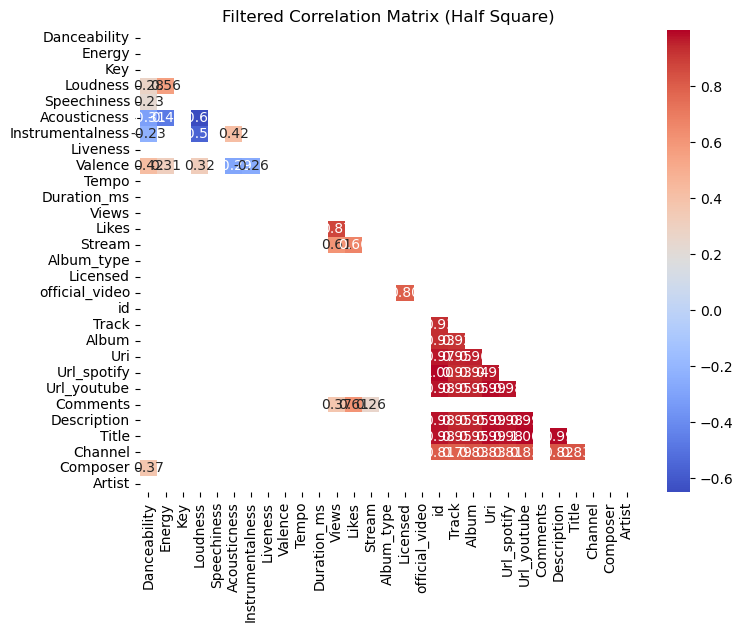

In [17]:
corr_matrix_with_threshold(df_train_embedding, 0.2)

In [18]:
def select_important_column(df, arr_column):
    df_dropped = df.drop(arr_column, axis=1)
    return df_dropped

In [19]:
arr_NOT_important_column = ['Uri', 'Url_spotify', 'Url_youtube', 'Description', 'id', 'Licensed', 'official_video', 'Title', 'Album']
df_train_embedding_important = select_important_column(df_train_embedding, arr_NOT_important_column)
df_test_embedding_important = select_important_column(df_test_embedding, arr_NOT_important_column)

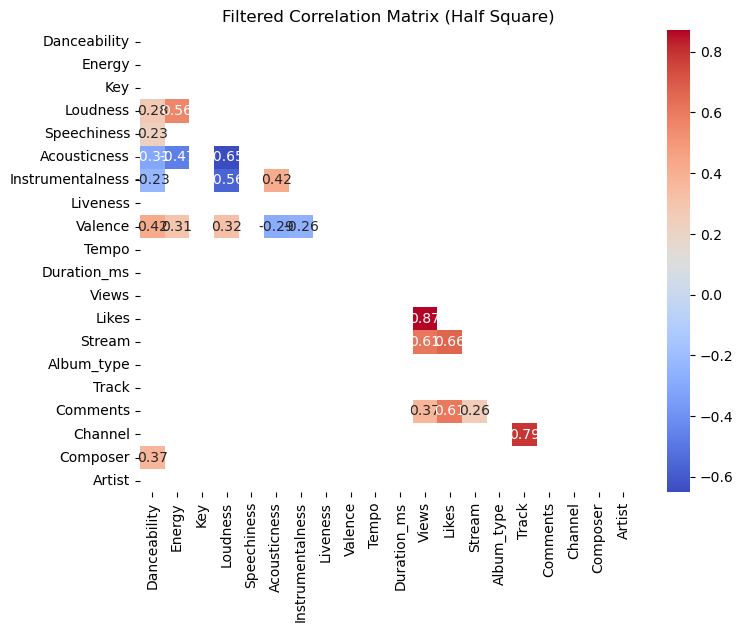

In [20]:
corr_matrix_with_threshold(df_train_embedding_important, 0.2)

In [21]:
arr_NOT_important_column = ['Key', 'Liveness', 'Tempo', 'Duration_ms',  'Album_type', 'Comments','Channel','Artist'  ]
df_train_embedding_important_simple = select_important_column(df_train_embedding_important, arr_NOT_important_column)
df_test_embedding_important_simple = select_important_column(df_test_embedding_important, arr_NOT_important_column)

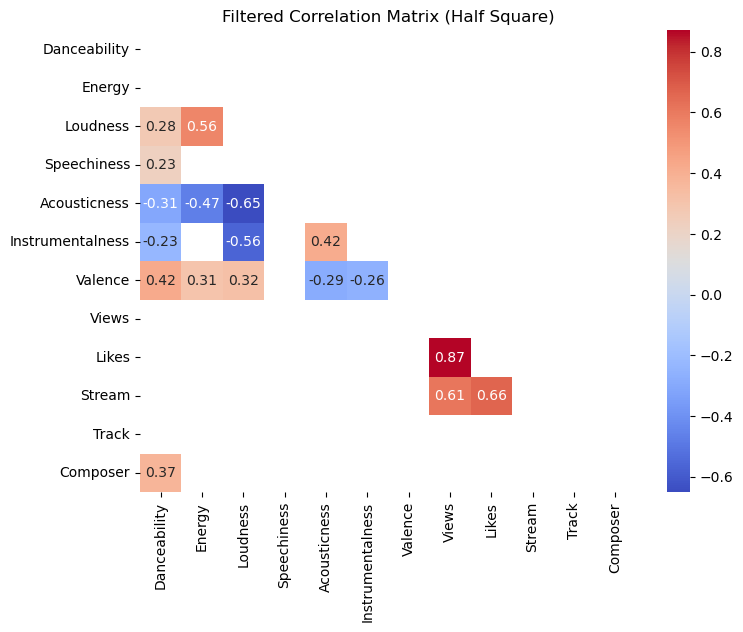

In [22]:
corr_matrix_with_threshold(df_train_embedding_important_simple, 0.2)

In [23]:
def imputer(df):
    df_ret = df.copy()
    mean_values = df['Loudness'].mean()
    df_ret['Loudness'] = df['Loudness'].fillna(mean_values)
    mean_values = df['Speechiness'].mean()
    df_ret['Speechiness'] = df['Speechiness'].fillna(mean_values)
    mean_values = df['Acousticness'].mean()
    df_ret['Acousticness'] = df['Acousticness'].fillna(mean_values) #0.000000000001)
    mean_values = df['Instrumentalness'].mean()
    df_ret['Instrumentalness'] = df['Instrumentalness'].fillna(mean_values)
    mean_values = df['Valence'].mean()
    df_ret['Valence'] = df['Valence'].fillna(mean_values)
    df_ret['Composer'] = df['Composer'].fillna(0)

    mean_values = df['Views'].mean()
    df_ret['Views'] = df['Views'].fillna(mean_values)

    mean_values = df['Likes'].mean()
    df_ret['Likes'] = df['Likes'].fillna(mean_values)

    mean_values = df['Track'].mean()
    df_ret['Track'] = df['Track'].fillna(mean_values)

    mean_values = df['Stream'].mean()
    df_ret['Stream'] = df['Stream'].fillna(mean_values)

    mean_values = df['Energy'].mean()
    df_ret['Energy'] = df['Energy'].fillna(mean_values)

    
    return df_ret

df_with_clean_data = df_train_embedding_important_simple.dropna()
df_train_embedding_important_simple_added = pd.concat([df_train_embedding_important_simple, df_with_clean_data, df_with_clean_data, df_with_clean_data, df_with_clean_data]).sample(frac=1).reset_index(drop=True)
df_train_embedding_important_simple_imputer = imputer(df_train_embedding_important_simple_added)    
df_test_embedding_important_simple_imputer = imputer(df_test_embedding_important_simple)    


In [24]:
df_test_embedding_important_simple_imputer

,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Views,Likes,Stream,Track,Composer
0,0.350403,-6.679000,0.177000,5.842771e-07,0.002330,0.488375,6.935552e+08,6.220896e+06,1.040235e+09,12977.000000,3
1,0.347429,-5.815000,0.030200,1.531935e-01,0.000687,0.852000,7.201164e+07,5.836651e+05,3.100837e+08,12978.000000,1
2,0.786330,-3.930000,0.052200,7.676563e-05,0.114404,0.551000,8.435055e+06,2.821420e+05,6.306347e+07,9505.730295,1
3,0.403583,-5.810000,0.026000,3.442951e-15,0.509000,0.578000,8.632007e+07,1.788577e+06,4.346636e+08,12979.000000,5
4,0.334255,-8.627000,0.171000,1.619428e-05,0.000000,0.525000,6.184810e+08,6.197318e+06,6.172597e+08,12980.000000,2
...,...,...,...,...,...,...,...,...,...,...,...
6310,0.160377,-6.366894,0.045451,3.176921e-01,0.006016,0.160253,9.636781e+06,5.807853e+04,1.750041e+07,11307.000000,6
6311,0.318585,-4.148566,0.073000,7.419596e-03,0.000817,0.614366,4.572846e+07,7.227992e+04,1.365601e+07,13251.000000,7
6312,0.426223,-5.807545,0.072906,6.617082e-01,0.898308,0.087281,-3.451740e+06,2.305163e+04,1.849094e+07,9505.730295,4
6313,0.204440,-11.563964,0.037676,3.630868e-03,0.491785,0.482987,1.728134e+07,5.836651e+05,1.199593e+08,9505.730295,7


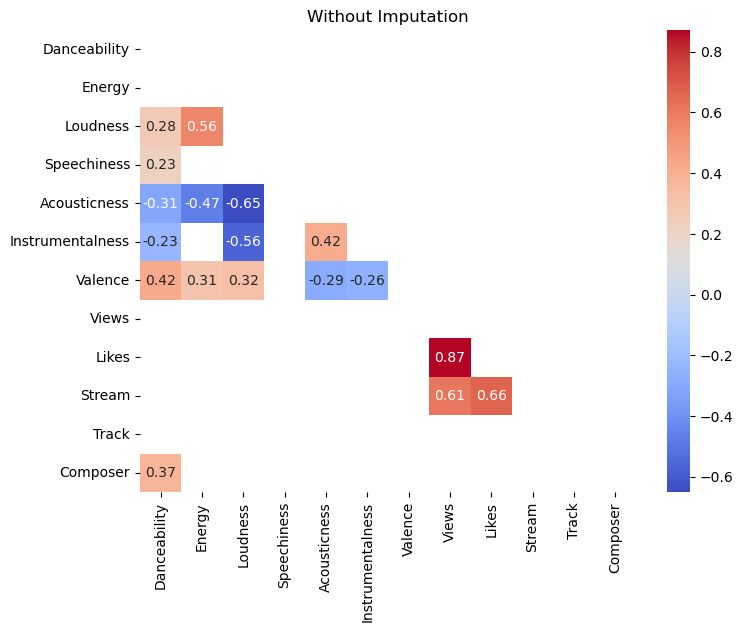

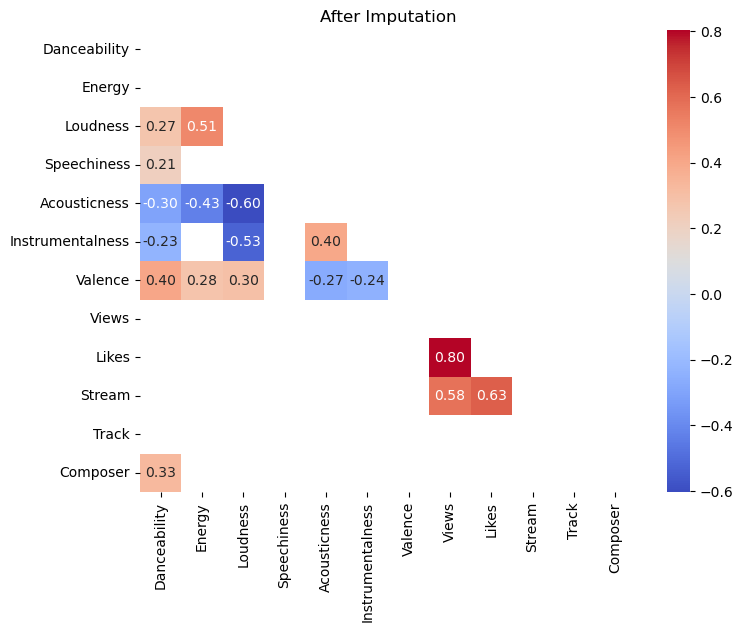

In [25]:
corr_matrix_with_threshold(df_train_embedding_important_simple, 0.2, 'Without Imputation')
corr_matrix_with_threshold(df_train_embedding_important_simple_imputer, 0.2, 'After Imputation')

In [26]:
from sklearn.model_selection import train_test_split
train_features, val_features, train_labels, val_labels = train_test_split(df_train_embedding_important_simple_imputer.iloc[:, 1:], df_train_embedding_important_simple_imputer.iloc[:, :1], test_size = 0.20, random_state = 123)

In [27]:
all_train_features = df_train_embedding_important_simple_imputer.iloc[:, 1:]
all_train_labels = df_train_embedding_important_simple_imputer.iloc[:, :1]

In [28]:
test_features = df_test_embedding_important_simple_imputer


In [27]:
train_labels

,Danceability
12484,7.0
27711,8.0
28677,8.0
12556,0.0
7889,5.0
...,...
28636,6.0
17730,4.0
28030,2.0
15725,8.0


In [28]:
val_features

,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Views,Likes,Stream,Track,Composer
24557,0.435520,-4.340000,0.031400,0.006968,0.057375,0.42400,3.814532e+07,3.463650e+05,100317173.0,8924.0,0.0
6371,0.000397,-25.284000,0.043600,0.356401,0.765000,0.03780,4.512920e+05,4.840000e+03,60818075.0,3389.0,1.0
10166,0.555412,-4.892000,0.064700,0.000001,0.000000,0.40900,3.275352e+06,1.740620e+05,11692225.0,11615.0,1.0
581,0.333438,-11.360000,0.045500,0.045118,0.000012,0.61100,3.715025e+07,2.481730e+05,63464225.0,1061.0,5.0
21925,0.851971,-3.390000,0.093600,0.005930,0.000000,0.52282,8.920589e+07,6.100000e+03,12061510.0,1363.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
21225,0.418509,-4.371000,0.152000,0.000820,0.000000,0.52282,8.920589e+07,1.511059e+06,46943967.0,11787.0,7.0
703,0.002863,-7.603801,0.038700,0.873723,0.057375,0.35400,8.920589e+07,1.158400e+04,47122396.0,9906.0,1.0
7424,0.050243,-16.427000,0.031700,0.895841,0.919000,0.21300,3.046490e+05,5.220000e+03,24953041.0,12405.0,4.0
15211,0.563560,-5.950000,0.031600,0.054872,0.011800,0.91400,6.608009e+06,2.001000e+04,10942747.0,3604.0,7.0


In [29]:
val_labels

,Danceability
24557,5.0
6371,0.0
10166,2.0
581,2.0
21925,7.0
...,...
21225,7.0
703,2.0
7424,7.0
15211,7.0


# Minmax

In [30]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
train_features_scaled = min_max_scaler.fit_transform(train_features)
val_features_scaled = min_max_scaler.transform(val_features)


In [31]:
test_features_scaled = min_max_scaler.transform(test_features)

In [34]:
all_train_features_scaled = min_max_scaler.transform(all_train_features)

In [33]:
# LGBM 
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# create dataset for lightgbm
lgb_train = lgb.Dataset(train_features_scaled, train_labels)
lgb_eval = lgb.Dataset(val_features_scaled, val_labels, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression_l1',
    'metric': {'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.9,
    'bagging_freq': 10,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,                                          
                num_boost_round=1000,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)



print('Starting predicting...')
# predict
y_pred = gbm.predict(val_features_scaled, num_iteration=gbm.best_iteration)
# eval MAE
print('The MAE of prediction is:', mean_absolute_error(val_labels, y_pred))


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001758 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's l1: 2.46978
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 2.42445
[3]	valid_0's l1: 2.37807
[4]	valid_0's l1: 2.33807
[5]	valid_0's l1: 2.30166
[6]	valid_0's l1: 2.26206
[7]	valid_0's l1: 2.22798
[8]	valid_0's l1: 2.19202
[9]	valid_0's l1: 2.15855
[10]	valid_0's l1: 2.12688
[11]	valid_0's l1: 2.09891
[12]	valid_0's l1: 2.07421
[13]	valid_0's l1: 2.05171
[14]	valid_0's l1: 2.02806
[15]	valid_0's l1: 2.00611
[16]	valid_0's l1: 1.98532
[17]	valid_0's l1: 1.96705
[18]	valid_0's l1: 1.94875
[19]	valid_0's l1: 1.93173
[20]	valid_0's l1: 1.91563
[21]	valid_0's l1: 1.90262
[22]	valid_0's l1: 1.88732
[23]	valid_0's l1: 1.87325
[24]	valid_0's l1: 1.85941


/home/zow/anaconda3/envs/fintech2/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[25]	valid_0's l1: 1.84695
[26]	valid_0's l1: 1.83431
[27]	valid_0's l1: 1.8228
[28]	valid_0's l1: 1.8125
[29]	valid_0's l1: 1.80276
[30]	valid_0's l1: 1.79345
[31]	valid_0's l1: 1.7847
[32]	valid_0's l1: 1.77576
[33]	valid_0's l1: 1.76764
[34]	valid_0's l1: 1.76086
[35]	valid_0's l1: 1.75435
[36]	valid_0's l1: 1.74851
[37]	valid_0's l1: 1.74241
[38]	valid_0's l1: 1.73682
[39]	valid_0's l1: 1.73129
[40]	valid_0's l1: 1.72594
[41]	valid_0's l1: 1.72135
[42]	valid_0's l1: 1.71612
[43]	valid_0's l1: 1.71144
[44]	valid_0's l1: 1.70688
[45]	valid_0's l1: 1.70286
[46]	valid_0's l1: 1.69815
[47]	valid_0's l1: 1.69373
[48]	valid_0's l1: 1.69039
[49]	valid_0's l1: 1.68717
[50]	valid_0's l1: 1.68362
[51]	valid_0's l1: 1.68067
[52]	valid_0's l1: 1.67745
[53]	valid_0's l1: 1.67436
[54]	valid_0's l1: 1.67154
[55]	valid_0's l1: 1.66854
[56]	valid_0's l1: 1.66564
[57]	valid_0's l1: 1.66333
[58]	valid_0's l1: 1.66075
[59]	valid_0's l1: 1.65846
[60]	valid_0's l1: 1.65608
[61]	valid_0's l1: 1.65337
[62]

In [43]:
# train with all data
lgb_train_all = lgb.Dataset(all_train_features_scaled, all_train_labels)
lgb_eval = lgb.Dataset(val_features_scaled, val_labels, reference=lgb_train)
gbm_all = lgb.train(params,
                lgb_train_all,
                num_boost_round=1000,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)



[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001664 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's l1: 2.46844
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 2.41952
[3]	valid_0's l1: 2.3724
[4]	valid_0's l1: 2.33211
[5]	valid_0's l1: 2.29251
[6]	valid_0's l1: 2.25002
[7]	valid_0's l1: 2.21529
[8]	valid_0's l1: 2.17872
[9]	valid_0's l1: 2.14596
[10]	valid_0's l1: 2.11267
[11]	valid_0's l1: 2.08233
[12]	valid_0's l1: 2.05768
[13]	valid_0's l1: 2.03268
[14]	valid_0's l1: 2.00782
[15]	valid_0's l1: 1.98469
[16]	valid_0's l1: 1.96373
[17]	valid_0's l1: 1.94512
[18]	valid_0's l1: 1.92593
[19]	valid_0's l1: 1.90796
[20]	valid_0's l1: 1.89116
[21]	valid_0's l1: 1.87581
[22]	valid_0's l1: 1.86018
[23]	valid_0's l1: 1.8469
[24]	valid_0's l1: 1.83299
[25]	valid_0's l1: 1.81969
[26]	valid_0's l1: 1.80686
[27]	valid_0's l1: 1.79454
[28]	valid_0's l1: 1.78315
[29]	valid_0's l1: 1.77254
[30

In [45]:
# predict on the test set
y_pred = gbm_all.predict(test_features_scaled, num_iteration=gbm_all.best_iteration)

predictionsTest = y_pred
preds = np.rint(predictionsTest)
preds = preds.astype(int)
preds = pd.DataFrame(preds, columns=['Danceability'])
preds['id'] = preds.index + 17170
preds = preds[['id', 'Danceability']]
preds.to_csv('LGBMscaled.csv', index=False)

In [46]:
#random forest on scaled data
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

rf = RandomForestRegressor(n_estimators=2000, random_state=42)
rf.fit(train_features_scaled, train_labels)

y_pred = rf.predict(val_features_scaled)
print('The MAE of prediction is:', mean_absolute_error(val_labels, y_pred))
#prob is close to the ensemble model

/tmp/ipykernel_20193/2551925516.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_features_scaled, train_labels)


The MAE of prediction is: 0.9327616611756547


# All Data

# Try Sofi's Ensemble

# Ensemble 

In [47]:
class LGBWrapper:
    def __init__(self, params=None, num_boost_round=10):
        self.params = params
        self.num_boost_round = num_boost_round
        self.model = None

    def fit(self, X, y):
        lgb_train = lgb.Dataset(X, y, free_raw_data=False)
        self.model = lgb.train(self.params, lgb_train, num_boost_round=self.num_boost_round)

    def predict(self, X):
        return self.model.predict(X)


In [48]:
# Prepare LightGBM parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mae',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1
}

# For XGBRegressor parameters
default_params = {
    'objective': 'reg:squarederror',
    'booster': 'gbtree',
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'random_state': 0,
    'n_jobs': -1
}


In [49]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

import pickle
scaler = MinMaxScaler(feature_range=(0, 9))
# Instantiate the classfiers and make a list
regressors = [
    LGBWrapper(params, num_boost_round=200),
    RandomForestRegressor(n_estimators=1000, random_state=42),
    RandomForestRegressor(n_estimators=2000, random_state=42),
    XGBRegressor(**default_params),
    OneVsOneClassifier(AdaBoostClassifier(n_estimators=45, random_state=42)),
]
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['regressors', 'mae'])

# Train and evaluate each classifier
for reg in regressors:
    reg.fit(train_features_scaled, train_labels)
    pred = reg.predict(val_features_scaled)
    accuracy = accuracy_score(val_labels, np.rint(pred))
    mae = mean_absolute_error(val_labels, pred)
    result_table = result_table.append({'regressors':reg.__class__.__name__, 'mae': mae, 'accuracy': accuracy}, ignore_index=True)

result_table.set_index('regressors', inplace=True)
result_table.sort_values(by=['mae'], ascending=True)




/tmp/ipykernel_20193/4078349787.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'regressors':reg.__class__.__name__, 'mae': mae, 'accuracy': accuracy}, ignore_index=True)
/tmp/ipykernel_20193/4078349787.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(train_features_scaled, train_labels)
/tmp/ipykernel_20193/4078349787.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'regressors':reg.__class__.__name__, 'mae': mae, 'accuracy': accuracy}, ignore_index=True)
/tmp/ipykernel_20193/4078349787.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_s

,mae,accuracy
regressors,,
RandomForestRegressor,0.932610,0.572221
RandomForestRegressor,0.932762,0.571528
LGBWrapper,1.521025,0.203919
XGBRegressor,1.714429,0.175481
OneVsOneClassifier,1.892839,0.285764


In [51]:
result_table

,mae,accuracy
regressors,,
LGBWrapper,1.521025,0.203919
RandomForestRegressor,0.932610,0.572221
RandomForestRegressor,0.932762,0.571528
XGBRegressor,1.714429,0.175481
OneVsOneClassifier,1.892839,0.285764


In [34]:
# train on the full training set
for reg in regressors:
    reg.fit(df_train_embedding_important_simple_imputer.iloc[:, 1:], df_train_embedding_important_simple_imputer.iloc[:, :1])

/tmp/ipykernel_14629/3599946808.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(df_train_embedding_important_simple_imputer.iloc[:, 1:], df_train_embedding_important_simple_imputer.iloc[:, :1])
/tmp/ipykernel_14629/3599946808.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(df_train_embedding_important_simple_imputer.iloc[:, 1:], df_train_embedding_important_simple_imputer.iloc[:, :1])
/home/zow/anaconda3/envs/fintech2/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
def ensemble_predict(regressors, X):
    # Initialize an empty array of predictions
    predictions = np.zeros((X.shape[0], len(regressors)))

    # Generate predictions for each regressor
    for i, reg in enumerate(regressors):
        predictions[:, i] = reg.predict(X)

    # Average the predictions
    avg_predictions = predictions.mean(axis=1)

    return avg_predictions, predictions

# Make ensemble predictions
ensemble_predictions, all_predictions = ensemble_predict(regressors, df_test_embedding_important_simple_imputer)


In [36]:
# A voting regressor is an ensemble meta-estimator that fits several base regressors, each on the whole dataset. 
# Then it averages the individual predictions to form a final prediction.
# predictionsTest = reg.predict(testScaled)
predictionsTest = ensemble_predictions
preds = np.rint(predictionsTest)
preds = preds.astype(int)
preds = pd.DataFrame(preds, columns=['Danceability'])
preds['id'] = preds.index + 17170
preds = preds[['id', 'Danceability']]
preds.to_csv('submission_imputer_adin_ens_ovo_simple_features.csv', index=False)

In [37]:
df_hasil = pd.DataFrame()
tmp = pd.read_csv('a1.csv')
tmp = tmp.drop('id', axis=1)
df_hasil = pd.concat([df_hasil, tmp], axis=1)
df_hasil = pd.concat([df_hasil, tmp], axis=1)
df_hasil = pd.concat([df_hasil, tmp], axis=1)
df_hasil = pd.concat([df_hasil, tmp], axis=1)

for t in range(1,8):
    tmp = pd.read_csv('a'+ str(t) +'.csv')
    tmp = tmp.drop('id', axis=1)
    df_hasil = pd.concat([df_hasil, tmp], axis=1)

# print(df_hasil)
label_test = df_hasil.mean(axis=1)

tmp_danceability = pd.DataFrame(np.rint(label_test), columns=['Danceability'])
concat_cheat = pd.concat([tmp_danceability, df_test_embedding_important_simple_imputer ], axis=1)
# print(concat_cheat)

# print(np.rint(predictionsTest))
# print(np.rint(label_test))
accuracy = accuracy_score(np.rint(label_test), np.rint(predictionsTest))
mae = mean_absolute_error(np.rint(label_test), np.rint(predictionsTest))

print("Cheat Kaggle MAE", mae, "Accuracy", accuracy)

Cheat Kaggle MAE 1.1146476642913699 Accuracy 0.281076801266825


In [38]:
pd_new_generated = pd.concat([df_train_embedding_important_simple_imputer, concat_cheat])
pd_new_generated = pd_new_generated.reset_index(drop=True)
pd_new_generated

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Views,Likes,Stream,Track,Composer
0,1.0,0.644973,-7.842000,0.090400,6.209914e-02,0.031400,0.749000,3.601422e+07,384995.000000,1.301922e+08,6191.000000,1.0
1,4.0,0.658503,-4.012000,0.095078,2.673090e-08,0.000000,0.523000,6.982415e+07,853799.000000,1.413766e+08,10814.000000,7.0
2,0.0,0.262144,-7.426000,0.060800,2.248091e-03,0.000008,0.105000,6.092801e+07,743990.000000,2.456014e+08,9961.000000,1.0
3,1.0,0.324243,-7.358000,0.120000,1.636673e-01,0.000000,0.385000,1.962246e+06,43102.000000,4.498766e+06,4192.000000,3.0
4,0.0,0.283593,-9.325000,0.093900,2.148495e-02,0.000028,0.325000,3.558260e+05,33990.000000,3.388188e+06,3610.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
35144,1.0,0.160377,-6.366894,0.045451,3.176921e-01,0.006016,0.160253,9.636781e+06,58078.533013,1.750041e+07,11307.000000,6.0
35145,7.0,0.318585,-4.148566,0.073000,7.419596e-03,0.000817,0.614366,4.572846e+07,72279.919039,1.365601e+07,13251.000000,7.0
35146,3.0,0.426223,-5.807545,0.072906,6.617082e-01,0.898308,0.087281,-3.451740e+06,23051.629825,1.849094e+07,9505.730295,4.0
35147,4.0,0.204440,-11.563964,0.037676,3.630868e-03,0.491785,0.482987,1.728134e+07,583665.110198,1.199593e+08,9505.730295,7.0


In [39]:
# train on the full training set
result_table = pd.DataFrame(columns=['regressors', 'mae'])

for reg in regressors:
    reg.fit(pd_new_generated.iloc[:, 1:], pd_new_generated.iloc[:, :1])
    pred = reg.predict(val_features)
    accuracy = accuracy_score(val_labels, np.rint(pred))
    mae = mean_absolute_error(val_labels, pred)
    result_table = result_table.append({'regressors':reg.__class__.__name__, 'mae': mae, 'accuracy': accuracy}, ignore_index=True)

result_table.set_index('regressors', inplace=True)
result_table.sort_values(by=['mae'], ascending=True)
result_table    
    

/tmp/ipykernel_14629/3590017159.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'regressors':reg.__class__.__name__, 'mae': mae, 'accuracy': accuracy}, ignore_index=True)
/tmp/ipykernel_14629/3590017159.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(pd_new_generated.iloc[:, 1:], pd_new_generated.iloc[:, :1])
/tmp/ipykernel_14629/3590017159.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'regressors':reg.__class__.__name__, 'mae': mae, 'accuracy': accuracy}, ignore_index=True)
/tmp/ipykernel_14629/3590017159.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

,mae,accuracy
regressors,,
LGBWrapper,1.484000,0.198717
RandomForestRegressor,0.337456,0.710595
RandomForestRegressor,0.337388,0.711809
XGBRegressor,1.738603,0.163863
OneVsOneClassifier,1.834229,0.291313


In [40]:
# Make ensemble predictions
ensemble_predictions, all_predictions = ensemble_predict(regressors, df_test_embedding_important_simple_imputer)


In [ ]:
# A voting regressor is an ensemble meta-estimator that fits several base regressors, each on the whole dataset. 
# Then it averages the individual predictions to form a final prediction.
# predictionsTest = reg.predict(testScaled)
predictionsTest = ensemble_predictions
preds = np.rint(predictionsTest)
preds = preds.astype(int)
preds = pd.DataFrame(preds, columns=['Danceability'])
preds['id'] = preds.index + 17170
preds = preds[['id', 'Danceability']]
preds.to_csv('submission_imputer_adin_ens_ovo_simple_features_generated_training.csv', index=False)